In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import imdb

# Import data

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

1641221/1641221 [==============================] - 0s 0us/step


In [6]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [8]:
train_data[10][:10]

[1, 785, 189, 438, 47, 110, 142, 7, 6, 7475]

In [9]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10][:10]])
print(decoded_review)

? french horror cinema has seen something of a revival


# Preprocesing data

In [10]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

In [11]:
print(x_train.shape)

(25000, 10000)


In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Modelling

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras import losses
from keras import metrics


model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), #1e-5
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                160016    
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
reduce_lr_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-8)

In [29]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping_callback,reduce_lr_callback],
    verbose = 1
)

Epoch 1/20
118/118 [==============================] - 3s 18ms/step - loss: 0.6891 - accuracy: 0.5372 - val_loss: 0.6839 - val_accuracy: 0.5812 - lr: 2.0000e-05
Epoch 2/20
118/118 [==============================] - 1s 8ms/step - loss: 0.6747 - accuracy: 0.6111 - val_loss: 0.6697 - val_accuracy: 0.6492 - lr: 2.0000e-05
Epoch 3/20
118/118 [==============================] - 1s 7ms/step - loss: 0.6580 - accuracy: 0.6632 - val_loss: 0.6510 - val_accuracy: 0.7007 - lr: 2.0000e-05
Epoch 4/20
118/118 [==============================] - 1s 8ms/step - loss: 0.6375 - accuracy: 0.6993 - val_loss: 0.6303 - val_accuracy: 0.7416 - lr: 2.0000e-05
Epoch 5/20
118/118 [==============================] - 1s 11ms/step - loss: 0.6136 - accuracy: 0.7368 - val_loss: 0.6084 - val_accuracy: 0.7700 - lr: 2.0000e-05
Epoch 6/20
118/118 [==============================] - 2s 13ms/step - loss: 0.5938 - accuracy: 0.7553 - val_loss: 0.5869 - val_accuracy: 0.7909 - lr: 2.0000e-05
Epoch 7/20
118/118 [=======================

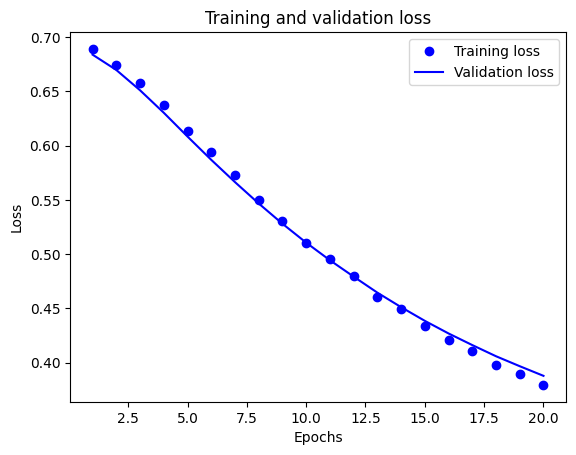

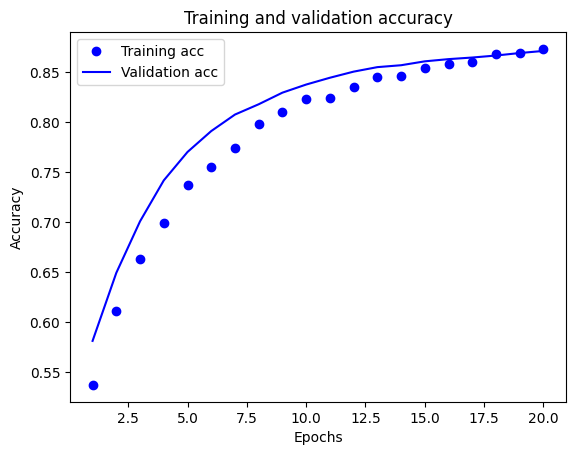

In [30]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [31]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 2s 3ms/step - loss: 0.3976 - accuracy: 0.8656
[0.39759987592697144, 0.865559995174408]


In [32]:
result = model.predict(x_test[0, :].reshape(1, 10000))
print(result)

1/1 [==============================] - 0s 51ms/step
[[0.44420326]]


In [33]:
model.save("my_model")